In [43]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('employees.csv')

In [18]:
data.head(10)

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores
5,6,Jones,Ernie,M,Richmond,Baker,Bakery,Richmond,Stores,48.440311,2.717692,81.830079,Stores
6,7,Buford,Ralph,M,Vancouver,Accounting Clerk,Accounting,Vancouver,FinanceAndAccounting,50.752730,10.157918,60.495072,HeadOffice
7,8,Lee,Gregory,M,Sechelt,Baker,Bakery,West Vancouver,Stores,36.216031,4.432123,30.072902,Stores
8,9,Smith,Jerry,M,New Westminster,Baker,Bakery,New Westminster,Stores,58.427380,6.940121,181.630819,Stores
9,10,Beard,Robert,M,Vancouver,Accounting Clerk,Accounting,Vancouver,FinanceAndAccounting,39.853980,13.848321,30.664408,HeadOffice


In [31]:
data.dtypes

EmployeeNumber      int64
Surname            object
GivenName          object
Gender             object
City               object
JobTitle           object
DepartmentName     object
StoreLocation      object
Division           object
Age               float64
LengthService     float64
AbsentHours       float64
BusinessUnit       object
dtype: object

In [23]:
data.describe()

,EmployeeNumber,Age,LengthService,AbsentHours
count,8336.000000,8336.000000,8336.000000,8336.000000
mean,4168.500000,42.007086,4.782910,61.283978
std,2406.540255,9.939798,2.462990,49.038365
min,1.000000,3.504743,0.012098,0.000000
25%,2084.750000,35.298748,3.575892,19.127590
50%,4168.500000,42.114924,4.600248,56.005808
75%,6252.250000,48.666943,5.623922,94.284692
max,8336.000000,77.938003,43.735239,272.530123


Da laut Aufgabenstellung mindestens jede Person einmal gefehlt hat, dürfen die AbsendHours nicht 0 sein

Mindestalter bei 3.5 ist auch etwas verdächtig

In [29]:
# remove all entries with 0 absent hours
data = data.drop(data[data['AbsentHours'] == 0].index)

In [34]:
data.describe()

,EmployeeNumber,Age,LengthService,AbsentHours
count,7016.000000,7016.000000,7016.000000,7016.000000
mean,4173.259265,44.431816,4.725939,72.814030
std,2399.021709,8.405747,2.182588,44.917608
min,1.000000,21.453808,0.053279,0.009680
25%,2092.750000,38.471232,3.562743,38.163118
50%,4190.500000,43.905133,4.595590,67.932227
75%,6260.250000,49.788294,5.606392,101.355790
max,8336.000000,77.938003,39.447349,272.530123


Nun haben alle Mitarbeitenden mindestens eine Absenz, zudem wurde damit auch gleich das Alterslimit auf 21 gehoben.

R Squared of Linear Regression: 0.6493487820751211


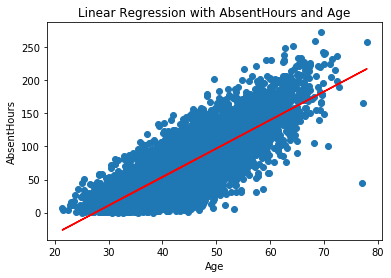

In [78]:
# linear regression with absenthours and age
x = np.array(data["Age"]).reshape(-1,1)
y = np.array(data["AbsentHours"])

model = LinearRegression().fit(x,y)

print(f'R Squared of Linear Regression: {model.score(x,y)}')
# Je näher der Wert an 1 ist desto besser

new_y = model.predict(x)

plt.scatter(x,y)
plt.plot(x,new_y,'r')
plt.title('Linear Regression with AbsentHours and Age')
plt.xlabel('Age')
plt.ylabel('AbsentHours')
plt.show()

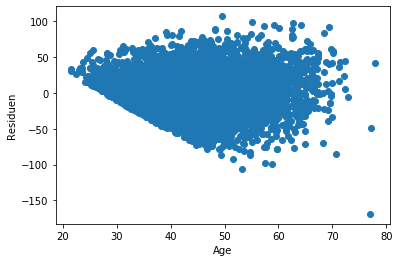

In [82]:
# calculate residues
residuen = y-new_y
plt.scatter(x,residuen)
plt.xlabel('Age')
plt.ylabel('Residuen')
plt.show()

### Residuenanalyse

1) Die Residuen haben den Erwartungswert 0, dh. es sollten keine systematischen Fehler geben im Modell: Mit zunehmendem Alter (bis ca 50) gibt es immer mehr Datenpunkte (Employees), was was erklärt?
2) Die Fehler sollten unabhängig voneinander sein
3) Die Fehler sollten normalsverteilt sein: Erfüllt, siehe Histogram

Es ist für die Firma empfehlenswert möglichst Junge Mitarbeitende einzustellen, da die Abwesenheiten mit steigendem Alter zunehmen

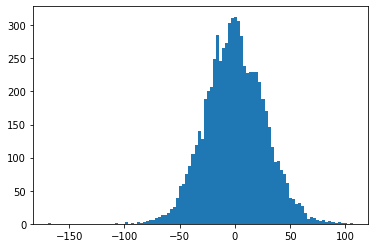

In [80]:
# plot histogram of residues to look at distribution
plt.hist(residuen, 100)
plt.show()

R Squared of Linear Regression: 0.0005010210095048873


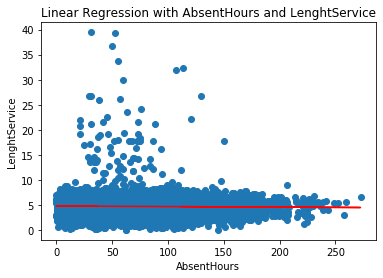

In [67]:
# linear regression with absenthours and LenghtService
x = np.array(data["AbsentHours"]).reshape(-1,1)
y = np.array(data["LengthService"])

model = LinearRegression().fit(x,y)

print(f'R Squared of Linear Regression: {model.score(x,y)}')
# Je näher der Wert an 1 ist desto besser

new_y = model.predict(x)

plt.scatter(x,y)
plt.plot(x,new_y,'r')
plt.title('Linear Regression with AbsentHours and LenghtService')
plt.xlabel('AbsentHours')
plt.ylabel('LenghtService')
plt.show()